In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dir='C:\\Users\\personal\\Desktop\\Brain tumour detection\\brain_tumor_dataset'

In [3]:
os.listdir(data_dir)

['no', 'yes']

In [4]:
train_path=data_dir
test_path='C:\\Users\\personal\\Desktop\\Brain tumour detection\\test'
train_bt_yes=data_dir+"\\yes"
train_bt_no=data_dir+"\\no"

In [5]:
os.listdir(train_bt_yes)[:5]

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']

In [6]:
y=train_bt_yes+"\\"+os.listdir(train_bt_yes)[0]
n=train_bt_no+"\\"+os.listdir(train_bt_no)[0]

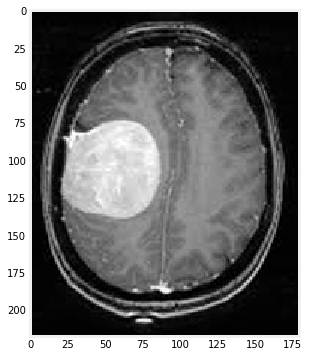

In [7]:
plt.figure(figsize=(10,6))
plt.imshow(imread(y))
plt.grid(False)

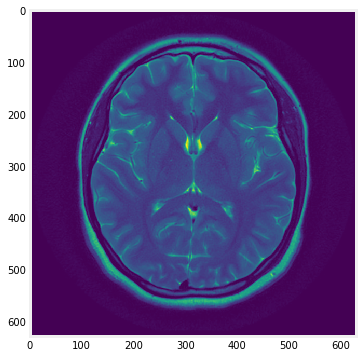

In [8]:
plt.figure(figsize=(10,6))
plt.imshow(imread(n))
plt.grid(False)

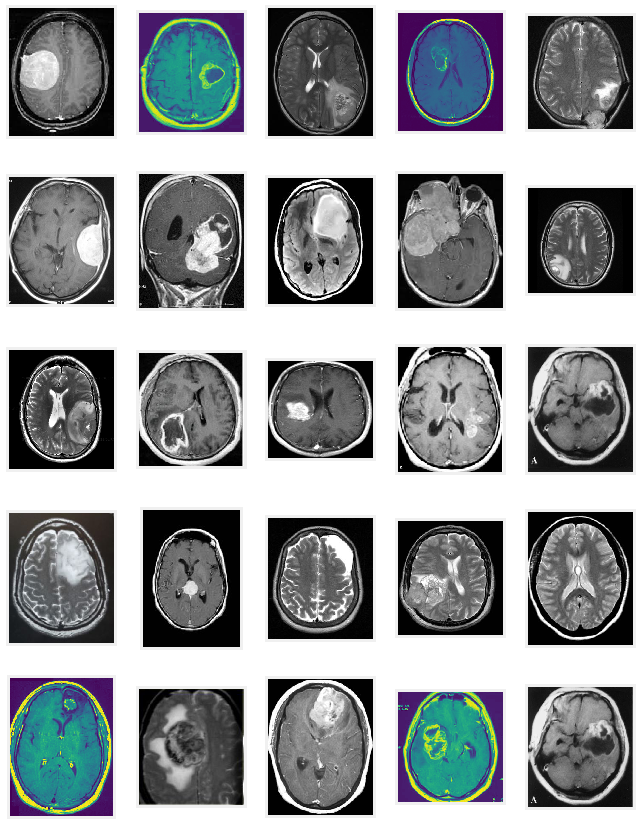

In [9]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    img=train_bt_yes+'\\'
    for j in os.listdir(train_bt_yes)[i:i+1]:
               img=img+j
    plt.imshow(imread(img))
plt.show()

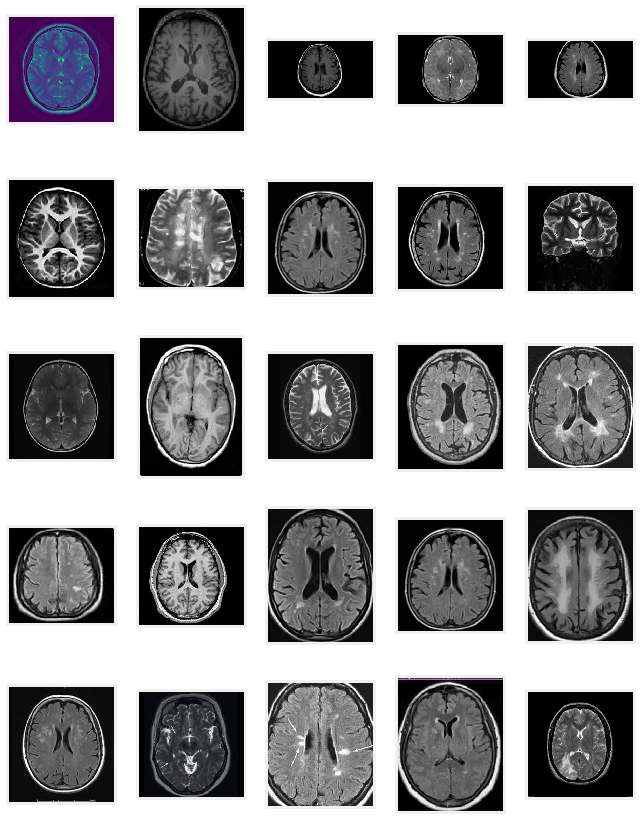

In [10]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    img=train_bt_no+'\\'
    for j in os.listdir(train_bt_no)[i:i+1]:
               img=img+j
    plt.imshow(imread(img))
plt.show()

In [11]:
in_dim1=[]
in_dim2=[]
l=len(os.listdir(train_bt_yes))
for i in range(l):
    img=train_bt_yes+'\\'
    for j in os.listdir(train_bt_yes)[i:i+1]:
               img=img+j
    in_dim1.append(imread(img).shape[0])
    in_dim2.append(imread(img).shape[1])

<Figure size 720x432 with 0 Axes>

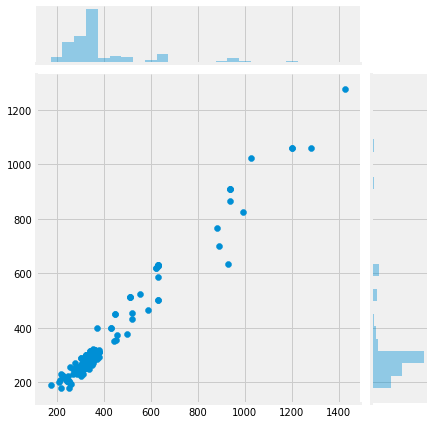

In [12]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.jointplot(in_dim1,in_dim2)

In [13]:
print(max(in_dim1))
print(max(in_dim2))
print(min(in_dim1))
print(min(in_dim2))

1427
1275
173
178


In [14]:
print(np.mean(in_dim1))
print(np.mean(in_dim2))

417.24305555555554
365.59027777777777


In [15]:
image_shape=(200,200,3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen=ImageDataGenerator(rotation_range=20,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          shear_range=0.1,
                          zoom_range=0.1,
                          horizontal_flip=True,
                          vertical_flip=True,
                          fill_mode='nearest')

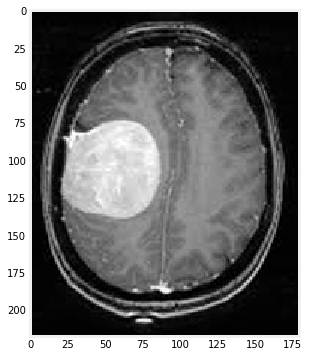

In [18]:
plt.figure(figsize=(10,6))
img=imread(y)
plt.imshow(img)
plt.grid(False)

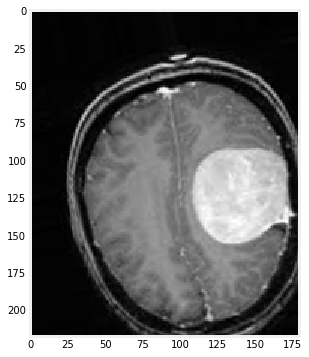

In [19]:
plt.figure(figsize=(10,6))
img=datagen.random_transform(imread(y))
plt.imshow(img)
plt.grid(False)

In [20]:
datagen.flow_from_directory(train_path)

Found 232 images belonging to 2 classes.


In [21]:
datagen.flow_from_directory(test_path)

Found 21 images belonging to 2 classes.


In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
def createmodel(optimizer="adam",loss="binary_crossentropy"):
    model=Sequential()
    model.add(Conv2D(filters=8,kernel_size=(11,11),input_shape=image_shape,activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    #model.add(BatchNormalization())
    model.add(Dense(32,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])
    return model
model=createmodel()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 8)       2912      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 95, 95, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 91, 91, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 32)        4

In [25]:
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=10)

In [26]:
train_image_gen=datagen.flow_from_directory(train_path,
                                           target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=8,
                                           class_mode='binary')

Found 232 images belonging to 2 classes.


In [27]:
test_image_gen=datagen.flow_from_directory(test_path,
                                           target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=8,
                                           class_mode='binary',
                                          shuffle=False)

Found 21 images belonging to 2 classes.


In [28]:
results=model.fit_generator(train_image_gen,epochs=25,
                           validation_data=test_image_gen,
                           callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
29/29 [==============================] - 12s 400ms/step - loss: 0.7353 - accuracy: 0.6509 - val_loss: 2.3685 - val_accuracy: 0.4762
Epoch 2/25
29/29 [==============================] - 11s 377ms/step - loss: 0.5855 - accuracy: 0.7284 - val_loss: 1.2444 - val_accuracy: 0.5238
Epoch 3/25
29/29 [==============================] - 13s 449ms/step - loss: 0.5204 - accuracy: 0.7457 - val_loss: 0.7106 - val_accuracy: 0.5714
Epoch 4/25
29/29 [==============================] - 13s 454ms/step - loss: 0.5334 - accuracy: 0.7155 - val_loss: 0.7432 - val_accuracy: 0.5714
Epoch 5/25
29/29 [==============================] - 13s 445ms/step - loss: 0.5425 - accuracy: 0.7371 - val_loss: 0.7784 - val_accuracy: 0.5238
Epoch 6/25
29/29 [==============================] - 13s 463ms/step - loss: 0.5176 - accuracy: 0.7414 - val_loss: 0.5107 - val_accuracy: 0.7143
Epoch 7/25
29/29 [==============================] - 13s 462ms/step

In [38]:
from tensorflow.keras.models import model_from_json

In [39]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [40]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [41]:
loaded_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
results=loaded_model.evaluate(test_image_gen)
print(f"loss is {results[0]}")
print(f"validation accuracy is {results[1]*100} %")

3/3 [==============================] - 0s 57ms/step - loss: 1.0952 - accuracy: 0.5714
loss is 1.095224142074585
validation accuracy is 57.14285969734192 %


In [43]:
loaded_model.metrics_names

['loss', 'accuracy']

In [44]:
loss=pd.DataFrame(model.history.history)

<Figure size 720x432 with 0 Axes>

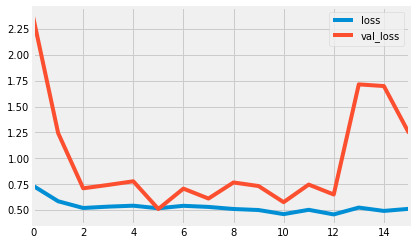

In [45]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

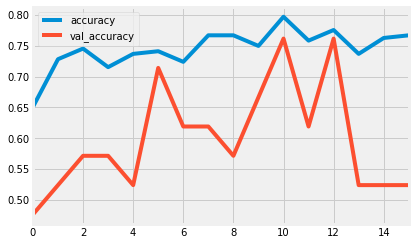

In [46]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [47]:
y_pred=loaded_model.predict(test_image_gen)

In [48]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
print(confusion_matrix(test_image_gen.classes,y_pred_classes))
print(classification_report(test_image_gen.classes,y_pred_classes))

[[10  0]
 [11  0]]
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        10
           1       0.00      0.00      0.00        11

    accuracy                           0.48        21
   macro avg       0.24      0.50      0.32        21
weighted avg       0.23      0.48      0.31        21



In [75]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.models import Model
from glob import glob
#model = VGG16()

In [76]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(test_path + '/*/*.jp*g')

In [77]:
image_size=[200,200]
batch_size=32
epochs=10
folders = glob(train_path + '/*')
#vgg16=VGG16(input_shape=image_size+[3],weights="imagenet",include_top=False)

In [78]:
def transfer_learning(model,optimizer,image_size):
    model=model(input_shape=image_size+[3],weights="imagenet",include_top=False)
    for layer in model.layers:
        layer.trainable=False
        
    x=Flatten()(model.output)
    x=Dense(1000,activation='relu')(x)
    prediction=Dense(len(folders),activation='softmax')(x)
    
    model=Model(inputs=model.input,outputs=prediction)
    
    model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
    
    return model
    

In [79]:
model=transfer_learning(VGG16,"Rmsprop",image_size)

In [80]:
genarator=ImageDataGenerator( rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=preprocess_input)

In [81]:
test_gen=genarator.flow_from_directory(test_path,target_size=image_size)
print(test_gen.class_indices)

Found 21 images belonging to 2 classes.
{'no': 0, 'yes': 1}


In [82]:
labels=[None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v]=k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 150.06717


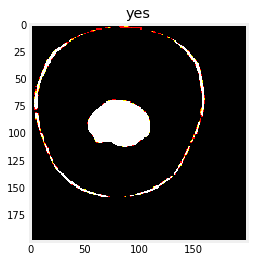

In [83]:
for x,y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.grid(False)
    plt.imshow(x[0])
    plt.show()
    break   

In [84]:
train_genarator=genarator.flow_from_directory(train_path,
                                              target_size=image_size,
                                              shuffle=True,
                                              batch_size=batch_size)

Found 232 images belonging to 2 classes.


In [85]:
validation_genarator=genarator.flow_from_directory(test_path,
                                              target_size=image_size,
                                              shuffle=False,
                                              batch_size=batch_size)

Found 21 images belonging to 2 classes.


In [86]:
results=model.fit(train_genarator,
                           validation_data=validation_genarator,
                           epochs=epochs)
                          # steps_per_epoch=len(image_files)//batch_size,
                           #validation_steps=len(valid_image_files)//batch_size)

Epoch 1/10
8/8 [==============================] - 34s 4s/step - loss: 91.5095 - accuracy: 0.5690 - val_loss: 3.8516 - val_accuracy: 0.7143
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 6.2100 - accuracy: 0.8190 - val_loss: 18.9132 - val_accuracy: 0.6190
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 11.0370 - accuracy: 0.7500 - val_loss: 1.9206 - val_accuracy: 0.8095
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 5.3817 - accuracy: 0.7457 - val_loss: 2.6291 - val_accuracy: 0.8571
Epoch 5/10
8/8 [==============================] - 36s 4s/step - loss: 2.9377 - accuracy: 0.8362 - val_loss: 7.3299 - val_accuracy: 0.7619
Epoch 6/10
8/8 [==============================] - 36s 4s/step - loss: 3.1340 - accuracy: 0.8276 - val_loss: 5.1479 - val_accuracy: 0.7619
Epoch 7/10
8/8 [==============================] - 37s 5s/step - loss: 4.5436 - accuracy: 0.7802 - val_loss: 1.6951 - val_accuracy: 0.7619
Epoch 8/10
8/8 [===============

In [87]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [88]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [89]:
loaded_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [90]:
result=loaded_model.evaluate(validation_genarator)
print(f"loss is {result[0]}")
print(f"validation accuracy is {result[1]*100} %")

1/1 [==============================] - 0s 2ms/step - loss: 1.1823 - accuracy: 0.8571
loss is 1.182264804840088
validation accuracy is 85.71428656578064 %


In [91]:
loss=pd.DataFrame(model.history.history)

<Figure size 720x432 with 0 Axes>

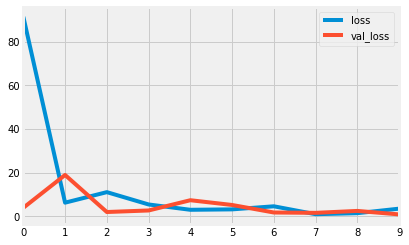

In [92]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

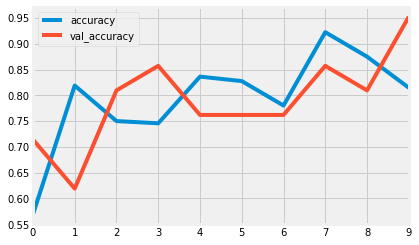

In [93]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [94]:
y_pred=loaded_model.predict(validation_genarator)

In [95]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [96]:
print(confusion_matrix(validation_genarator.classes,y_pred_classes))
print(classification_report(validation_genarator.classes,y_pred_classes))

[[ 9  1]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.91      0.91      0.91        11

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [100]:
img="C:\\Users\\personal\\Desktop\\Brain tumour detection\\verify"
os.listdir(img)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg']

In [101]:
def image_prediction(imgpath):
    my_image=image.load_img(imgpath,target_size=image_size)
    my_image=image.img_to_array(my_image)
    my_image=np.expand_dims(my_image,axis=0)
    class_type=np.argmax(loaded_model.predict(my_image),axis=1)
    plt.imshow((image.load_img(imgpath)))
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(labels[class_type[0]],color="blue")
    plt.show()

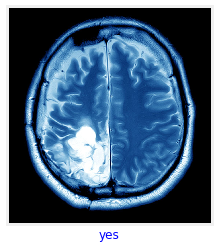

In [109]:
imgno=1
image_prediction(img+"\\"+str(imgno)+".jpg")